In [1]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../data/Binance_BTCUSDT_d.csv', sep=",")
df = df[['date', 'low', 'high']]
df.shape

(1364, 3)

In [3]:
for i in range(len(df['date'])):
    df['date'][i] = df['date'][i][:10]

df = df.sort_values('date')

<ipython-input-3-4e12f19fe07d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i][:10]


In [4]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
mid_prices = mid_prices.reshape(-1,1)

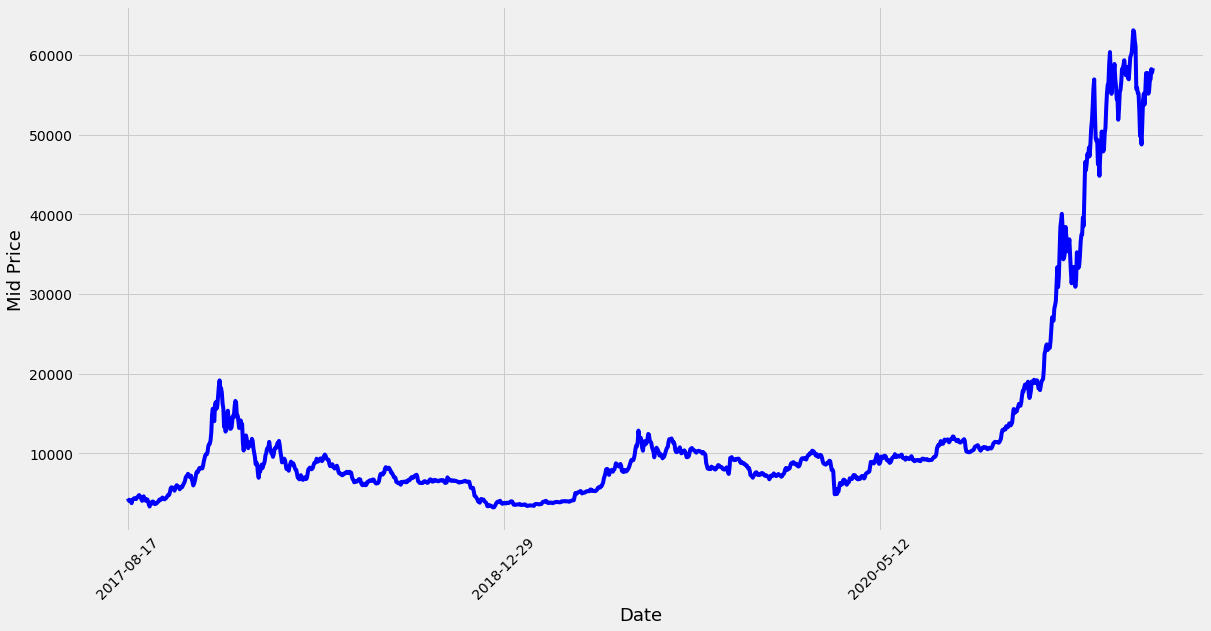

In [5]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0, color='b')
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
#plt.ylim((0,130))
plt.show()

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1))
cut_data=1 
#cut_data = math.ceil(len(mid_prices) *.9)
mid_prices = mid_prices[cut_data:]
scaled_data = scaler.fit_transform(mid_prices)

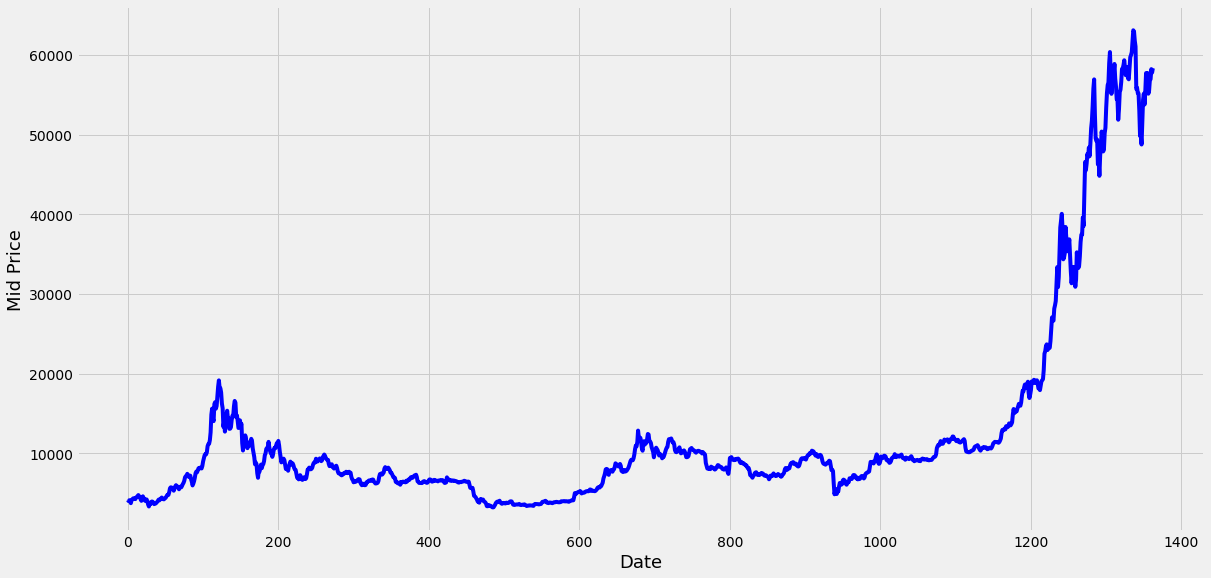

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(0,len(mid_prices)),mid_prices, color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
#plt.ylim((0,130))
plt.show()

In [8]:
train_dataset_length = math.ceil(len(mid_prices) * .95)
print(train_dataset_length)

1295


In [9]:
train_data = scaled_data[0:train_dataset_length  , : ]

#Splitting the data
x_train=[]
y_train = []

# for i in range(10, len(train_data)):
#     x_train.append(train_data[i-10:i,0])
#     y_train.append(train_data[i,0])

for i in range(0, len(train_data)):
    x_train.append([i,0])
    y_train.append(train_data[i,0])


In [10]:
#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into 3-D array
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

In [12]:
#compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30, batch_size = 1)

Epoch 1/30
1295/1295 [==============================] - 20s 2ms/step - loss: 0.0189
Epoch 2/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0156
Epoch 3/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0184
Epoch 4/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0158
Epoch 5/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0195
Epoch 6/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0189
Epoch 7/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0142
Epoch 8/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0160
Epoch 9/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0174
Epoch 10/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0174
Epoch 11/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0200
Epoch 12/30
1295/1295 [==============================] - 3s 2ms/step - loss: 0.0169


In [13]:
#Test data set
test_data = scaled_data[train_dataset_length : , : ]

#splitting the x_test and y_test data sets
x_test = []
y_test =  mid_prices[train_dataset_length : , : ] 


for i in range(0,len(test_data)):
    x_test.append(test_data[i,0])
   
    
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)
print(x_test.shape)

#Reshape the data into 3-D array
x_test = np.reshape(x_test, (-1,1,1))

#print(x_test,"test",y_test)
x_test.shape

(68,)


(68, 1, 1)

In [14]:
#check predicted values
predictions = model.predict(x_test) 
#Undo scaling
predictions_real = scaler.inverse_transform(predictions)

#Calculate RMSE score
rmse=np.sqrt(np.mean(((predictions_real- y_test)**2)))

print("RMSE: ",rmse, " last x_test results: ", x_test[len(x_test)-1])
print("last predictions: ",predictions[len(predictions)-10:len(predictions)])
#print("last predictions: ",predictions)
print("shapes test, pred ",x_test.shape, predictions.shape)

RMSE:  46078.558035946706  last x_test results:  [[0.92034479]]
last predictions:  [[0.11723389]
 [0.11723386]
 [0.11723389]
 [0.11723378]
 [0.1172338 ]
 [0.11723385]
 [0.11723386]
 [0.11723391]
 [0.11723389]
 [0.11723391]]
shapes test, pred  (68, 1, 1) (68, 1)


In [15]:
#testingfaktor = x_test[len(x_test)-1][0]/predictions[len(predictions)-1][0]
#testingfaktor = testingfaktor[0]
testingfaktor = 1


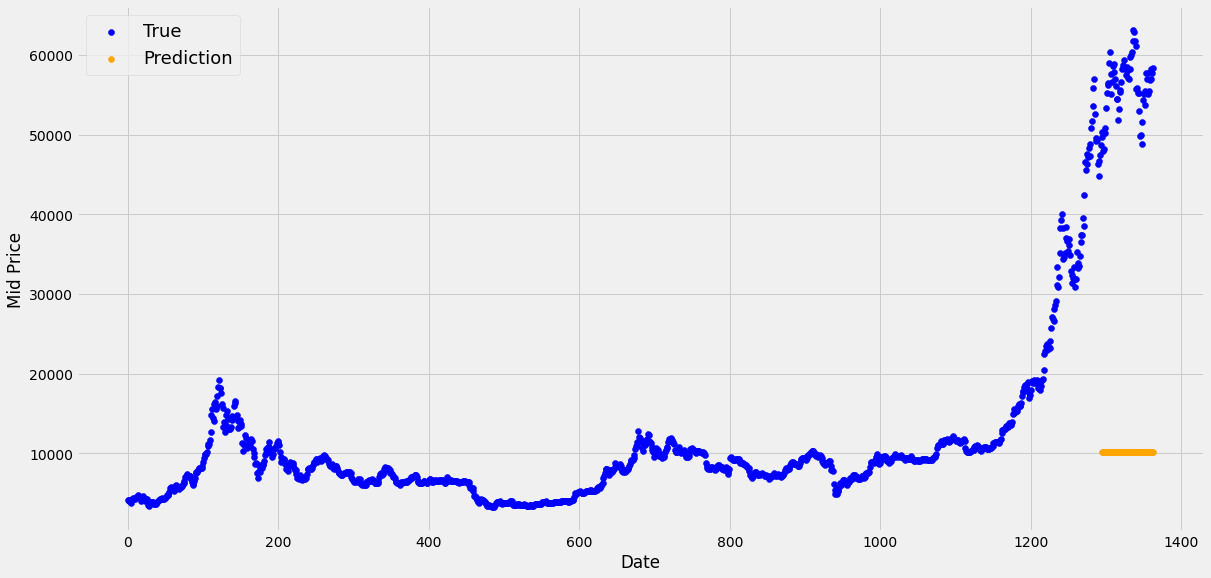

In [16]:
plt.figure(figsize = (18,9))
plt.scatter(range(0,len(mid_prices),1),mid_prices,color='b',label='True')
#plt.scatter(range(0,len(predictions),1),mid_prices[train_dataset_length:],color='b',label='True')
plt.scatter(range(len(mid_prices)-len(predictions),len(mid_prices),1),predictions_real*testingfaktor,color='orange', label='Prediction')
#plt.plot(predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()




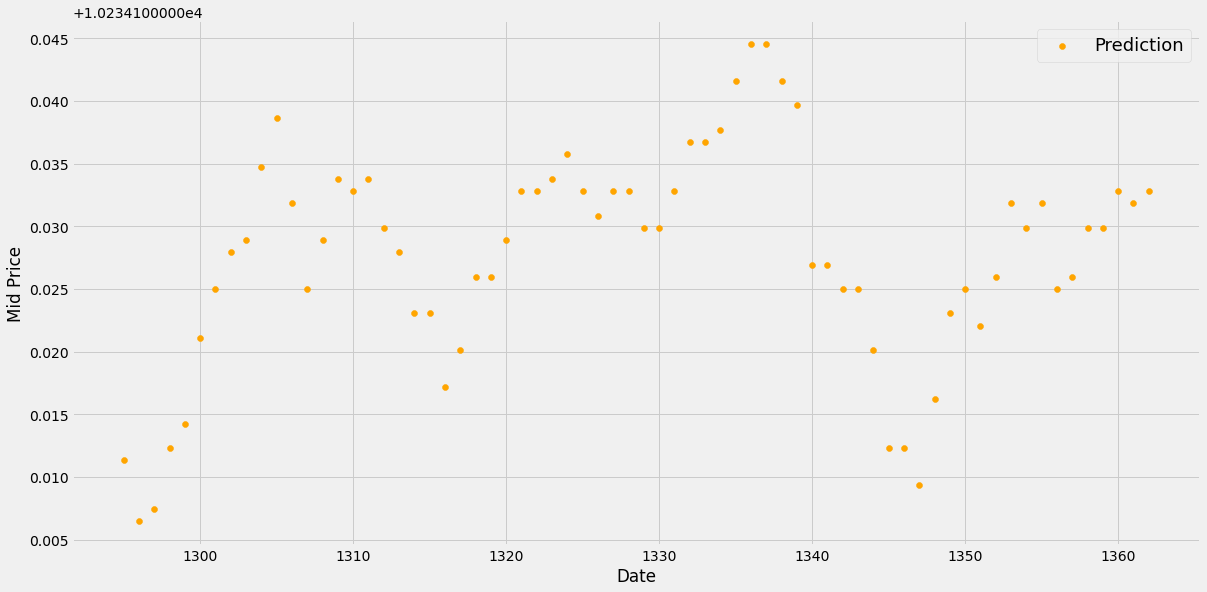

In [17]:
plt.figure(figsize = (18,9))
#plt.scatter(range(0,len(mid_prices),1),mid_prices,color='b',label='True')
#plt.scatter(range(0,len(predictions),1),mid_prices[train_dataset_length:],color='b',label='True')
plt.scatter(range(len(mid_prices)-len(predictions),len(mid_prices),1),predictions_real,color='orange', label='Prediction')
#plt.plot(predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [18]:
np.savetxt("../data/testing.csv", predictions, delimiter=",")


In [19]:
f=open('../data/testing.csv','ab')
a= np.array([1,2,3])
np.savetxt(f,a)
f.close()

In [20]:
future_pred = x_test
future_pred = future_pred.reshape(-1,1)
#print(predictions[len(predictions)-10:],future_pred[len(future_pred)-10:])
future_pred = np.concatenate((future_pred,testingfaktor * predictions[len(predictions)-1:]))
#print("##################################################")
#print(predictions[len(predictions)-10:],future_pred[len(future_pred)-10:])
print(future_pred.shape)
new_pred = []
for i in range(0,len(future_pred)):
    new_pred.append(future_pred[i,0])

new_pred = np.array(new_pred)

#new_pred = np.reshape(new_pred, (new_pred.shape[0],new_pred.shape[1],1))
new_pred = np.reshape(new_pred, (-1,1,1))
#check predicted values
predictions2 = model.predict(new_pred) 
#Undo scaling
predictions_real2 = scaler.inverse_transform(predictions2)

(69, 1)


In [21]:
counter = 0
while counter < 20:  

    future_pred = new_pred
    future_pred = future_pred.reshape(-1,1)
#print(predictions[len(predictions)-10:],future_pred[len(future_pred)-10:])
    print(future_pred.shape)
    future_pred = np.concatenate((future_pred,testingfaktor * predictions2[len(predictions2)-1:]))
    print(future_pred.shape)
#print("##################################################")
#print(predictions[len(predictions)-10:],future_pred[len(future_pred)-10:])
#print(future_pred.shape)


    #print(len(future_pred))
    new_pred = []
    for i in range(0,len(future_pred)):
        new_pred.append(future_pred[i,0])

    new_pred = np.array(new_pred)

    #new_pred = np.reshape(new_pred, (new_pred.shape[0],new_pred.shape[1],1))
    new_pred = np.reshape(new_pred, (-1,1,1))
    #print(new_pred[len(new_pred)-1:])
    #check predicted values
    predictions2 = model.predict(new_pred) 
    #print(new_pred.shape)
    counter += 1
#Undo scaling
predictions_real2 = scaler.inverse_transform(predictions2)

(69, 1)
(70, 1)
(70, 1)
(71, 1)
(71, 1)
(72, 1)
(72, 1)
(73, 1)
(73, 1)
(74, 1)
(74, 1)
(75, 1)
(75, 1)
(76, 1)
(76, 1)
(77, 1)
(77, 1)
(78, 1)
(78, 1)
(79, 1)
(79, 1)
(80, 1)
(80, 1)
(81, 1)
(81, 1)
(82, 1)
(82, 1)
(83, 1)
(83, 1)
(84, 1)
(84, 1)
(85, 1)
(85, 1)
(86, 1)
(86, 1)
(87, 1)
(87, 1)
(88, 1)
(88, 1)
(89, 1)


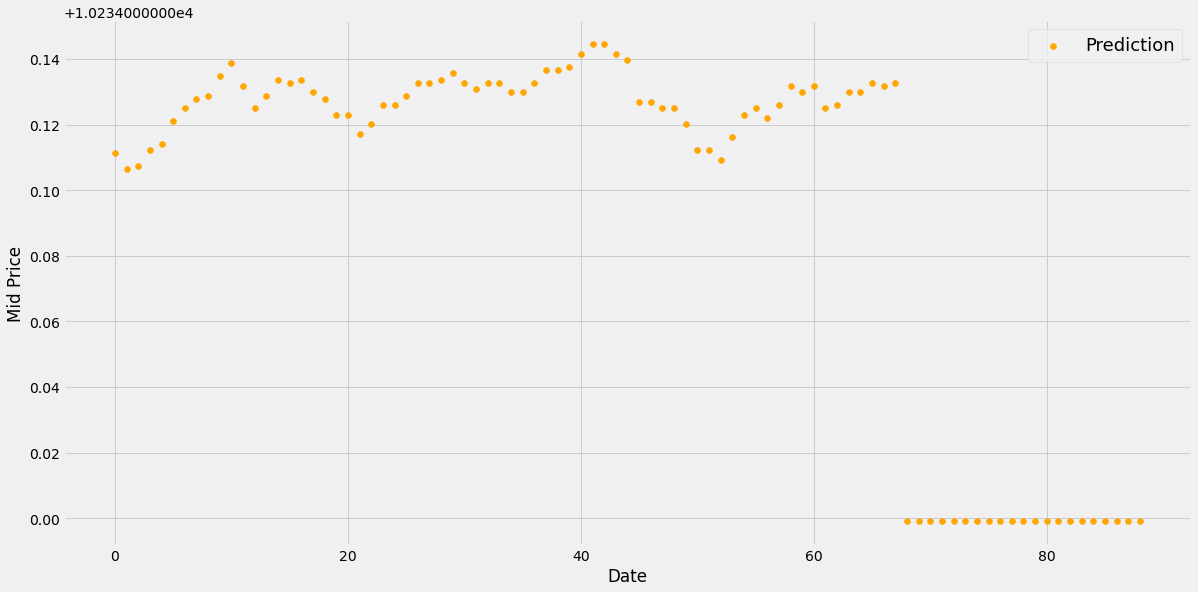

In [24]:
plt.figure(figsize = (18,9))
#plt.scatter(range(0,len(predictions),1),mid_prices[train_dataset_length:],color='b',label='True')
plt.scatter(range(0,len(predictions2),1),predictions_real2,color='orange', label='Prediction')
#plt.scatter(range(len(predictions2)-17,len(predictions2),1),predictions_real2[len(predictions2)-17:],color='red', label='Prediction')
#plt.plot(predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

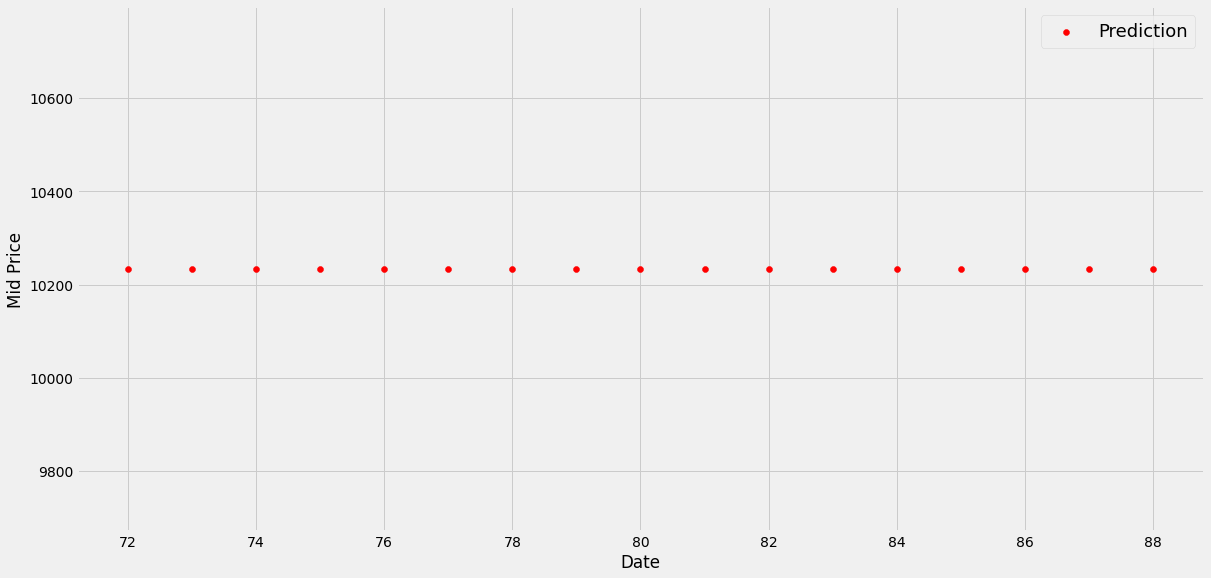

In [23]:
plt.figure(figsize = (18,9))
#plt.scatter(range(0,len(predictions),1),mid_prices[train_dataset_length:],color='b',label='True')
#plt.scatter(range(0,len(predictions2),1),predictions_real2,color='orange', label='Prediction')
plt.scatter(range(len(predictions2)-17,len(predictions2),1),predictions_real2[len(predictions2)-17:],color='red', label='Prediction')
#plt.plot(predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()